In [42]:
import requests
import pandas as pd
import sys, json
import json
import string
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

url="https://archive.org/advancedsearch.php?q=肺炎+OR+腹瀉+OR+咳嗽&output=json&rows=50000"

In [43]:
response = requests.get(url).json()

In [44]:
response

{'responseHeader': {'status': 0,
  'QTime': 162,
  'params': {'query': '( (title:肺炎^100 OR salients:肺炎^50 OR subject:肺炎^25 OR description:肺炎^15 OR collection:肺炎^10 OR language:肺炎^10 OR text:肺炎^1) OR (title:腹瀉^100 OR salients:腹瀉^50 OR subject:腹瀉^25 OR description:腹瀉^15 OR collection:腹瀉^10 OR language:腹瀉^10 OR text:腹瀉^1) OR (title:咳嗽^100 OR salients:咳嗽^50 OR subject:咳嗽^25 OR description:咳嗽^15 OR collection:咳嗽^10 OR language:咳嗽^10 OR text:咳嗽^1) )',
   'qin': '肺炎 OR 腹瀉 OR 咳嗽',
   'fields': '_default_',
   'wt': 'json',
   'rows': '50000',
   'start': 0}},
 'response': {'numFound': 471,
  'start': 0,
  'docs': [{'btih': '121a3f88b6d45970341a46146d1eedc06ad3d65d',
    'collection': ['opensource_audio', 'community'],
    'creator': '巴黎傻娃',
    'description': '一年前的4月15号，巴黎圣母院经历了850多年来的“至暗时刻”。 一年后的4月15号，除了克制的纪念和回忆，还有人们对火灾原因的追问。',
    'downloads': 12,
    'format': ['Archive BitTorrent',
     'Columbia Peaks',
     'Item Tile',
     'Metadata',
     'PNG',
     'Spectrogram',
     'VBR MP3'],
  

In [45]:
response['response']['docs'][1]['publicdate']

'2020-05-09T17:03:18Z'

In [46]:
dates = [""]*9999
for count,row in enumerate(response['response']['docs']):
    try:
        dates[count]=row['publicdate']
    except:
        try:
            dates[count]=row['date']
        except:
            pass


In [47]:
dates

['2020-04-15T19:49:44Z',
 '2020-05-09T17:03:18Z',
 '2020-04-14T23:09:23Z',
 '2019-05-31T00:27:59Z',
 '2020-04-10T07:12:10Z',
 '2020-04-06T19:15:32Z',
 '2020-11-30T05:22:14Z',
 '2020-03-13T10:14:33Z',
 '2020-10-08T00:53:35Z',
 '2020-05-27T10:55:51Z',
 '2021-06-23T09:58:45Z',
 '2021-05-23T10:32:29Z',
 '2020-03-30T00:28:47Z',
 '2020-02-07T12:27:00Z',
 '2020-03-18T13:48:13Z',
 '2021-06-23T09:03:45Z',
 '2021-02-19T05:14:55Z',
 '2020-04-22T16:19:20Z',
 '2020-04-02T22:16:22Z',
 '2020-01-15T19:16:45Z',
 '2020-04-11T16:04:41Z',
 '2021-07-01T22:58:22Z',
 '2021-06-23T10:23:04Z',
 '2021-07-03T21:35:12Z',
 '2020-05-14T16:41:16Z',
 '2020-02-18T09:48:54Z',
 '2020-04-02T23:13:31Z',
 '2020-03-14T11:17:22Z',
 '2020-03-23T02:41:59Z',
 '2020-04-10T07:32:13Z',
 '2020-04-02T18:31:45Z',
 '2020-04-23T18:39:07Z',
 '2020-03-29T12:09:08Z',
 '2016-06-05T14:20:54Z',
 '2020-03-13T04:53:41Z',
 '2020-09-21T19:35:26Z',
 '2020-01-30T03:08:35Z',
 '2020-03-25T07:57:33Z',
 '2020-04-03T09:44:42Z',
 '2021-08-19T10:03:02Z',


In [48]:
dates = [x for x in dates if x]

In [49]:
dates = [x for x in dates if str(dates[0]) != "0"]

In [50]:
dates

['2020-04-15T19:49:44Z',
 '2020-05-09T17:03:18Z',
 '2020-04-14T23:09:23Z',
 '2019-05-31T00:27:59Z',
 '2020-04-10T07:12:10Z',
 '2020-04-06T19:15:32Z',
 '2020-11-30T05:22:14Z',
 '2020-03-13T10:14:33Z',
 '2020-10-08T00:53:35Z',
 '2020-05-27T10:55:51Z',
 '2021-06-23T09:58:45Z',
 '2021-05-23T10:32:29Z',
 '2020-03-30T00:28:47Z',
 '2020-02-07T12:27:00Z',
 '2020-03-18T13:48:13Z',
 '2021-06-23T09:03:45Z',
 '2021-02-19T05:14:55Z',
 '2020-04-22T16:19:20Z',
 '2020-04-02T22:16:22Z',
 '2020-01-15T19:16:45Z',
 '2020-04-11T16:04:41Z',
 '2021-07-01T22:58:22Z',
 '2021-06-23T10:23:04Z',
 '2021-07-03T21:35:12Z',
 '2020-05-14T16:41:16Z',
 '2020-02-18T09:48:54Z',
 '2020-04-02T23:13:31Z',
 '2020-03-14T11:17:22Z',
 '2020-03-23T02:41:59Z',
 '2020-04-10T07:32:13Z',
 '2020-04-02T18:31:45Z',
 '2020-04-23T18:39:07Z',
 '2020-03-29T12:09:08Z',
 '2016-06-05T14:20:54Z',
 '2020-03-13T04:53:41Z',
 '2020-09-21T19:35:26Z',
 '2020-01-30T03:08:35Z',
 '2020-03-25T07:57:33Z',
 '2020-04-03T09:44:42Z',
 '2021-08-19T10:03:02Z',


In [51]:
lastdates=len(dates)
newdates=0
while (newdates != lastdates):
    lastdates=newdates
    for i,row in enumerate(dates):    
        if dates[i][:4] < '2018':
            del dates[i]
            newdates=len(dates)

In [52]:
len(dates)

468

In [53]:
min(dates)

'2018-02-13T10:21:58Z'

In [54]:
max(dates)

'2021-09-02T08:02:27Z'

In [55]:
df = pd.DataFrame(dates)
#df = df.value_counts().sort_index()

In [56]:
df[0] = pd.to_datetime(df[0], dayfirst=True)

df1 = df[0].dt.date.value_counts().sort_index().reset_index()

df1.columns = ['DATE','Count']

In [57]:
df1['DATE'] = pd.to_datetime(df1['DATE'])

In [58]:
df1.set_index('DATE', inplace=True)

In [59]:
df1

,Count
DATE,
2018-02-13,1
2019-04-16,1
2019-04-19,1
2019-05-28,1
2019-05-31,2
...,...
2021-08-10,1
2021-08-11,1
2021-08-19,1


In [60]:
# drop the first row if nonsense
# df1.drop(df1.index[0],inplace=True)

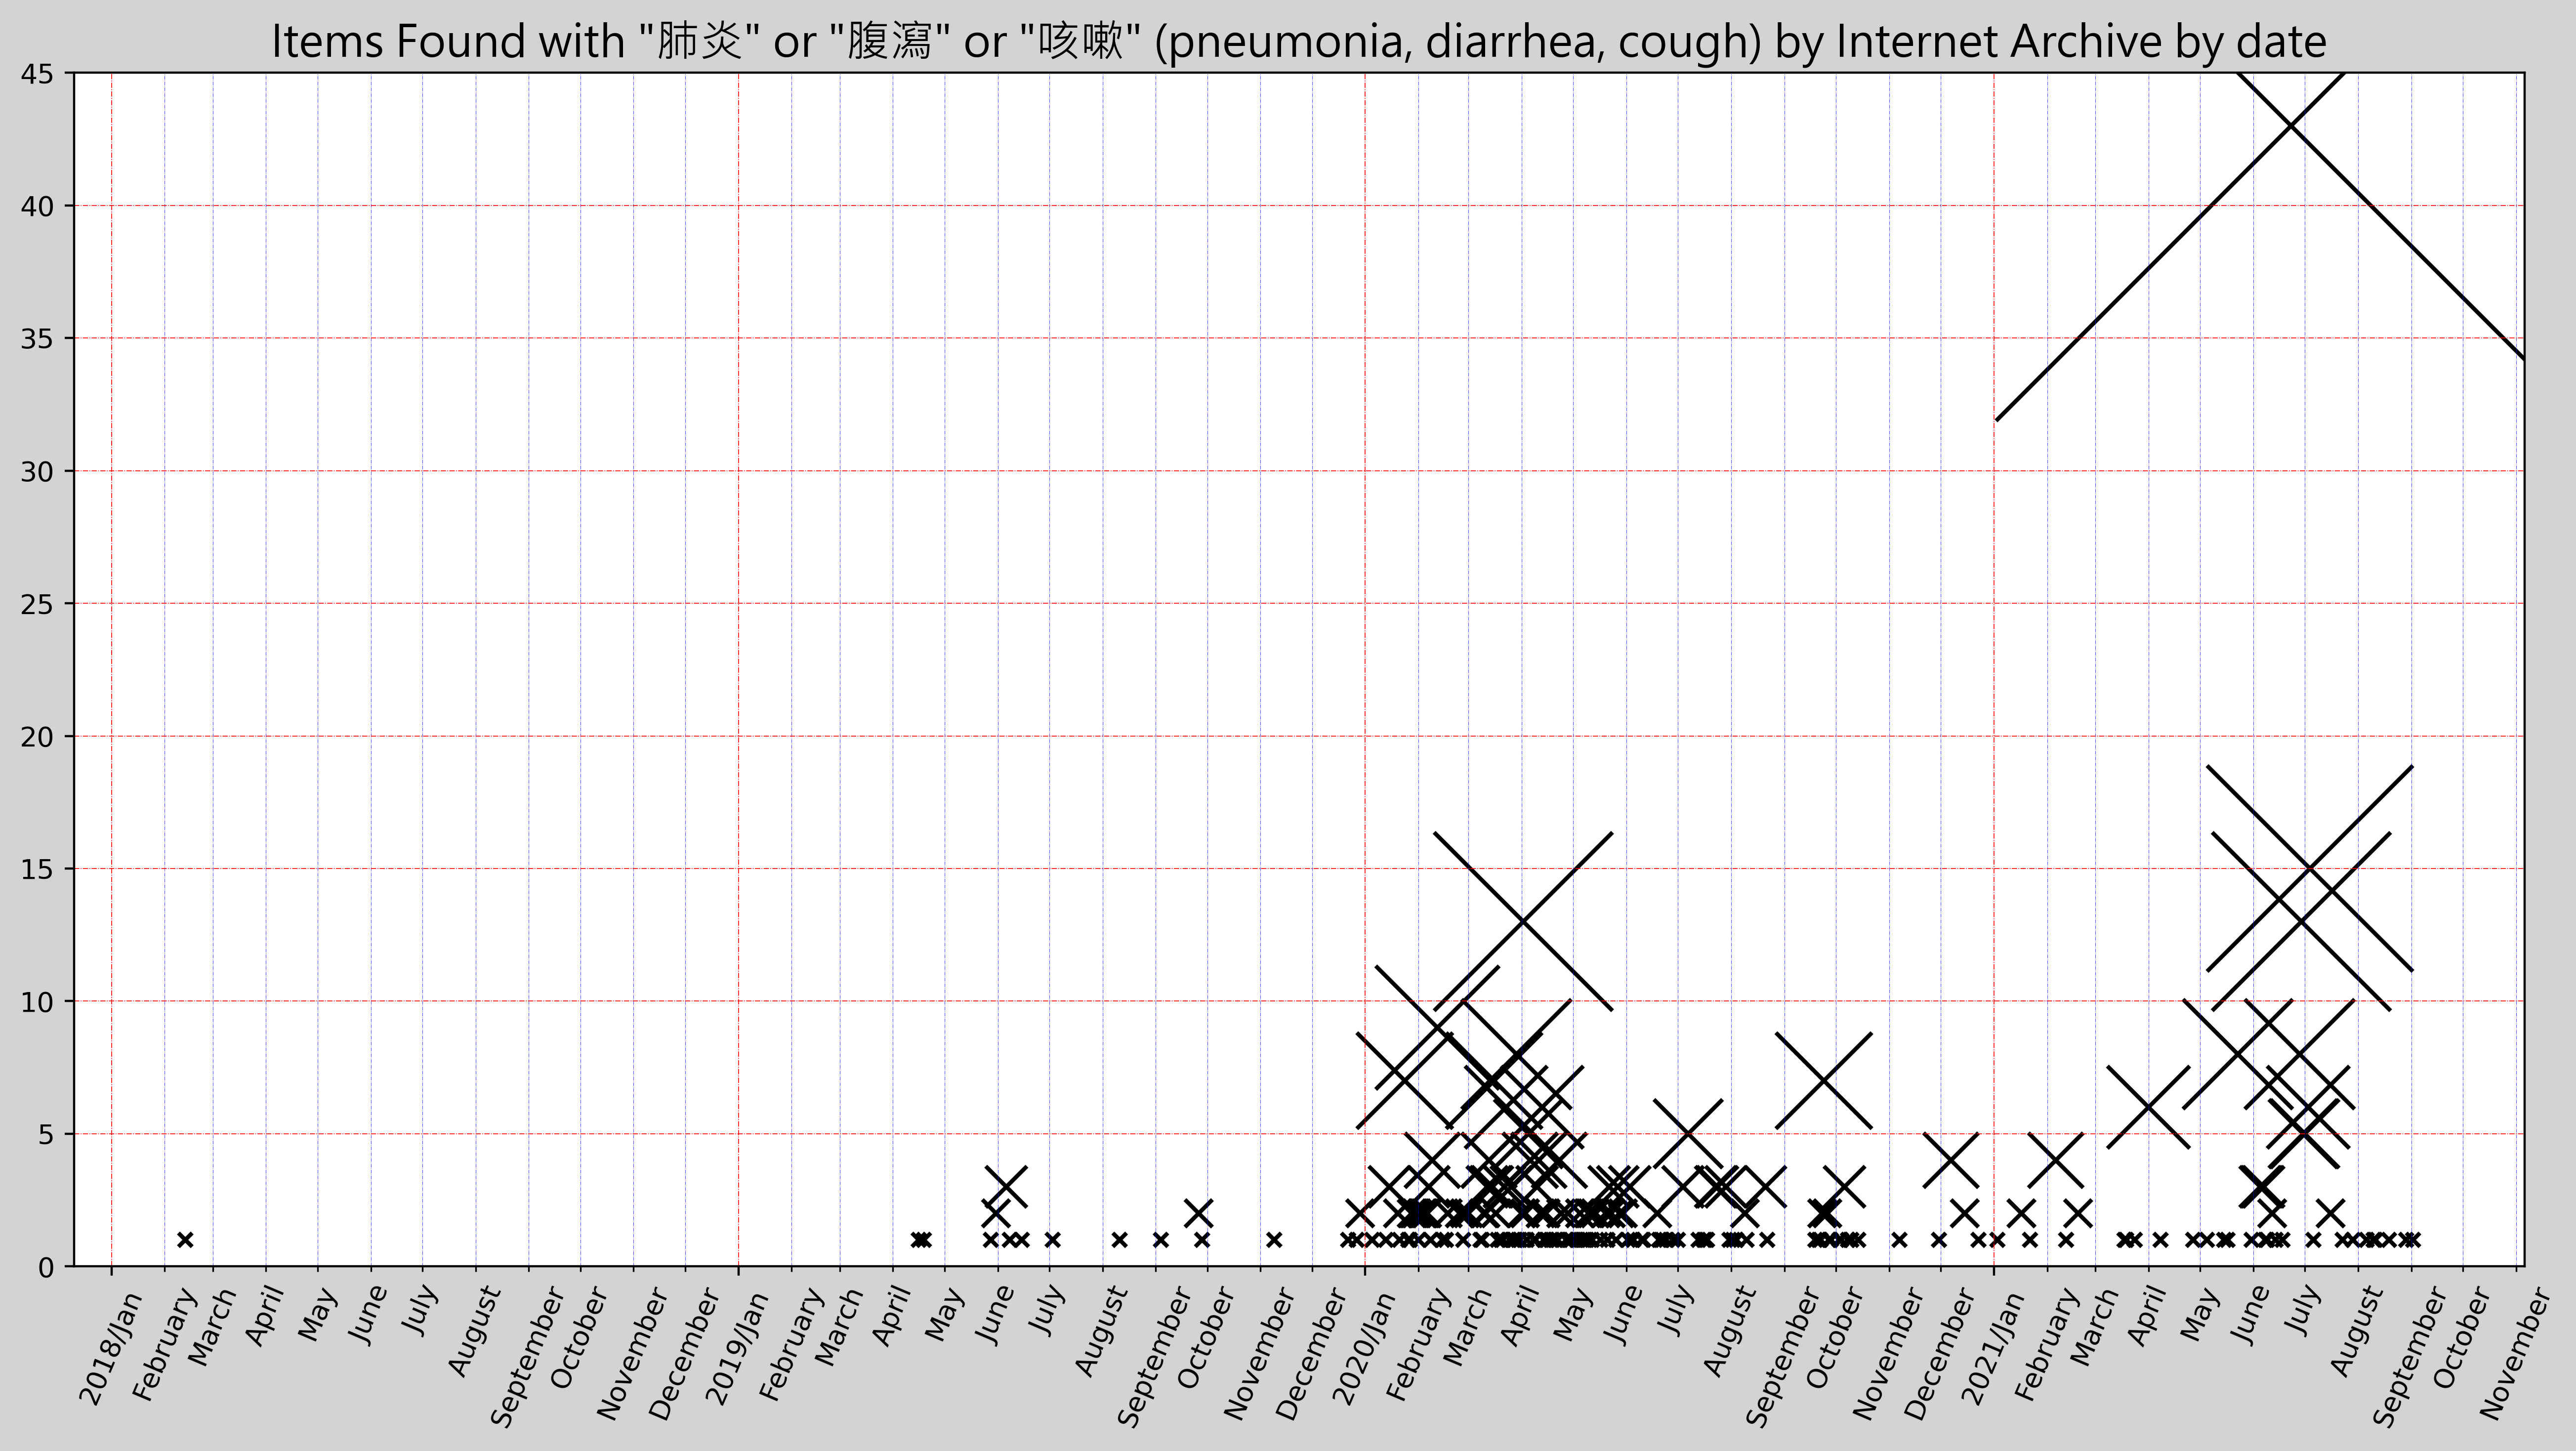

In [62]:
%matplotlib inline
x = df1.index
y = df1['Count']
tfont = {'fontname':'Microsoft JhengHei'}
fig= plt.figure(figsize=(16, 8), dpi=400,facecolor='lightgray')

plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().tick_params(axis="x", which="both", rotation=67)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(x,y,s=y*y*25,marker='x',color='k')
plt.gca().grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
plt.gca().grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
plt.ylim(top=45,bottom=0)
plt.title('Items Found with "肺炎" or "腹瀉" or "咳嗽" (pneumonia, diarrhea, cough) by Internet Archive by date',**tfont,size=16)

plt.show()
plt.close()

In [ ]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from celluloid import Camera

fig = plt.figure(figsize=(16, 9), dpi=300,facecolor='lightgray')
ax=  fig.gca()
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%B'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.tick_params(axis="x", which="both", rotation=67)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y/%b'))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(which='major', color='r', linestyle='-.', linewidth=.3, alpha=1)  
ax.grid(which='minor', color='b', linestyle='-.', linewidth=.2,alpha=.7)
ax.set_ylim(top=100,bottom=0)

plt.title('Items Found with "Wuhan" by Internet Archive by date',size=16)

rows = []
a = 0
camera = Camera(fig)
for i,row in df1.iterrows():
    rows=df1[:i]
    ax.scatter(rows['Count'].index,rows['Count'],s=rows['Count']*4,marker='x',color='k')
    camera.snap()

anim = camera.animate(blit=False)

anim.save('scatter.gif',fps=60)

plt.show()
plt.close()